# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
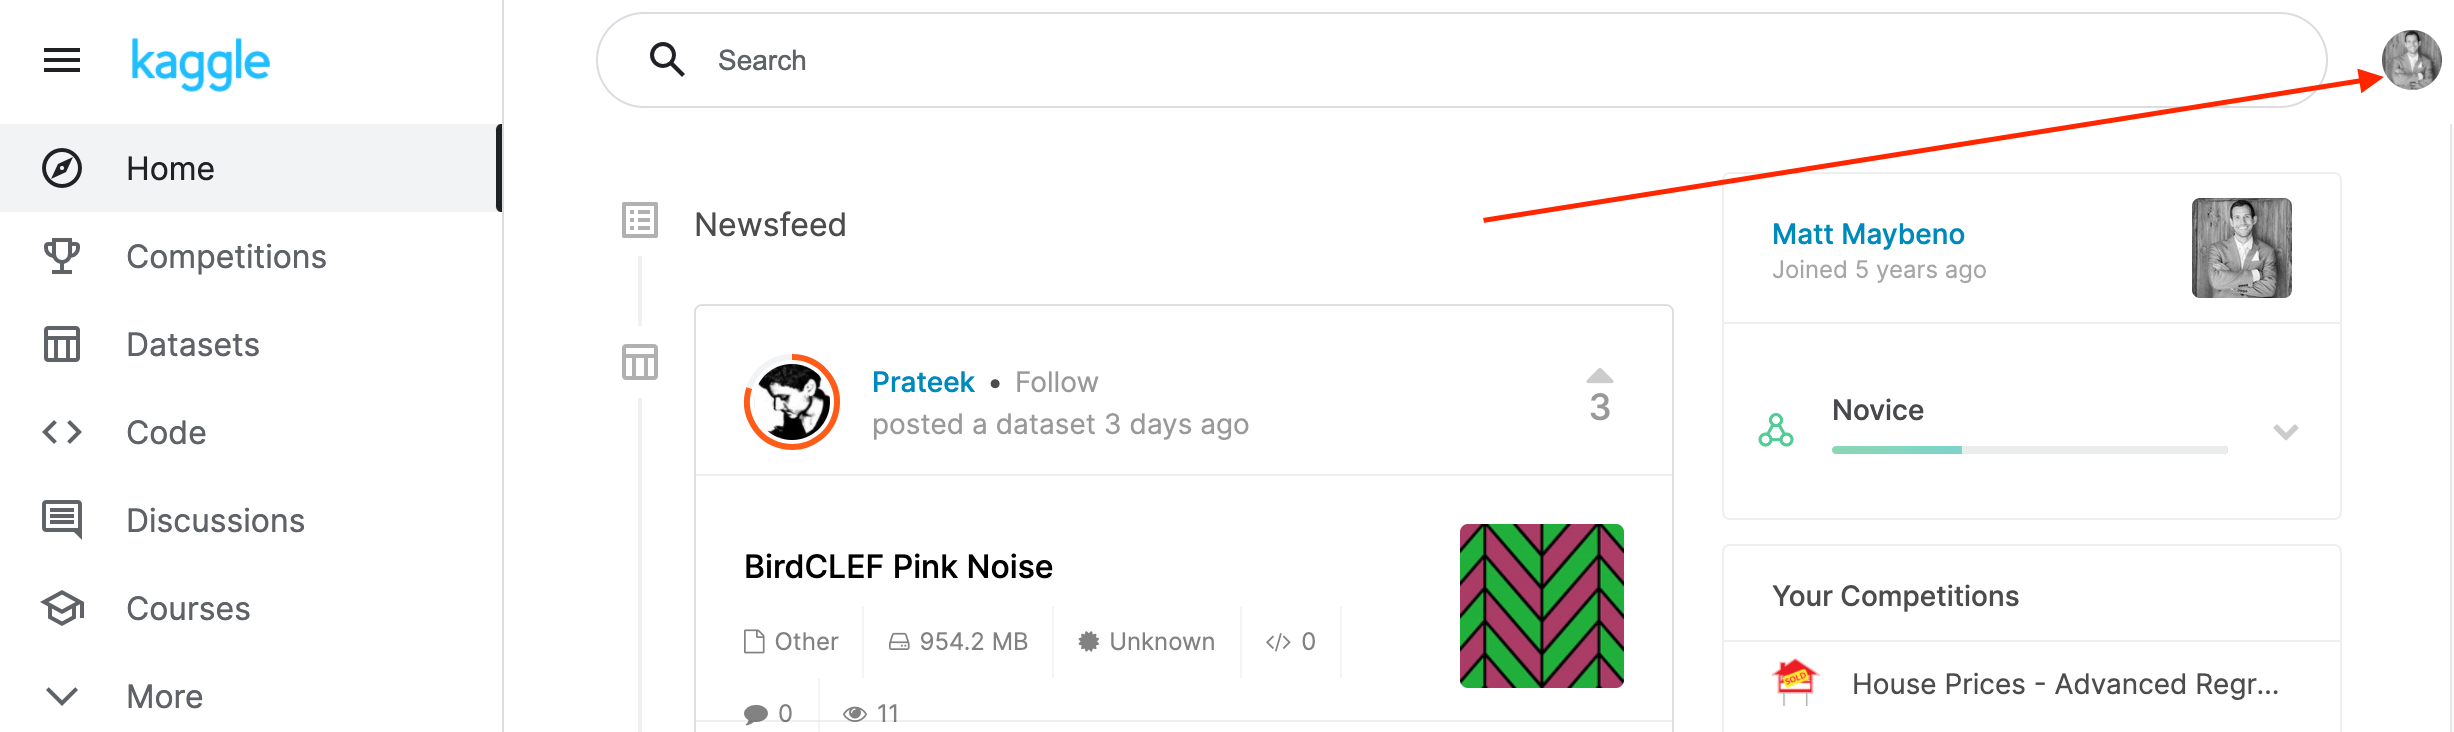
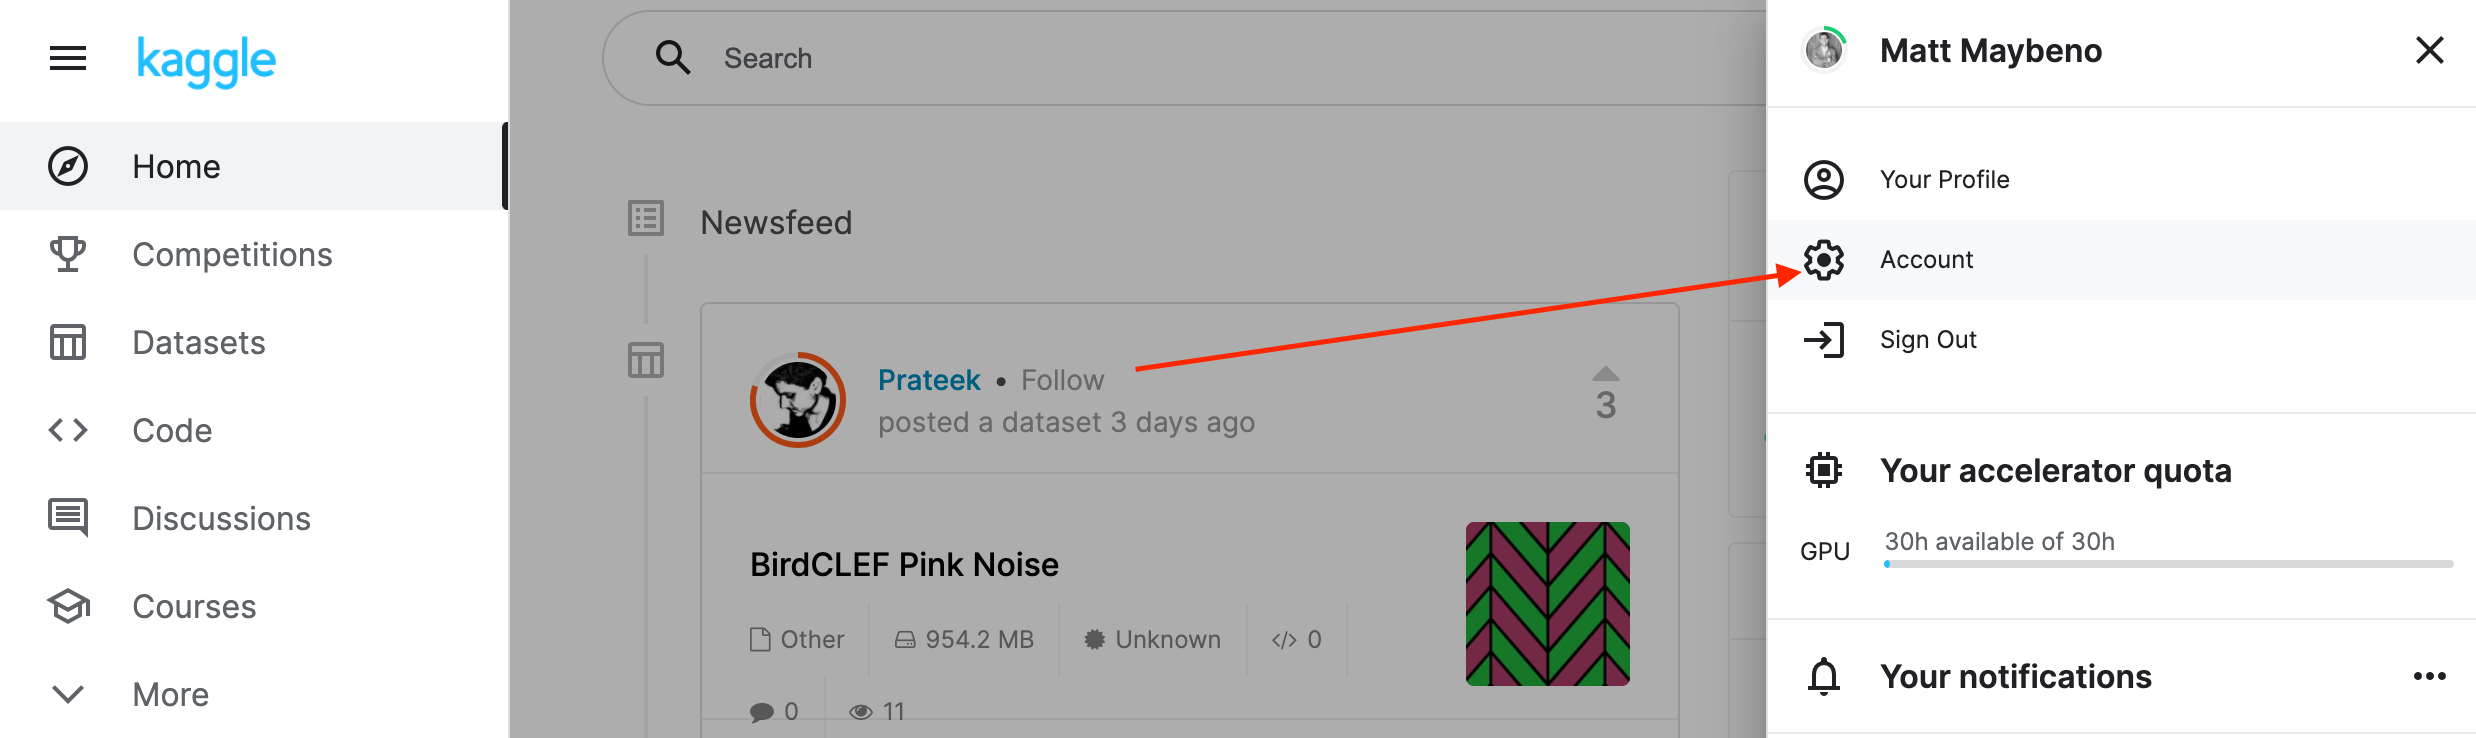
2. Scroll down to API and click Create New API Token.
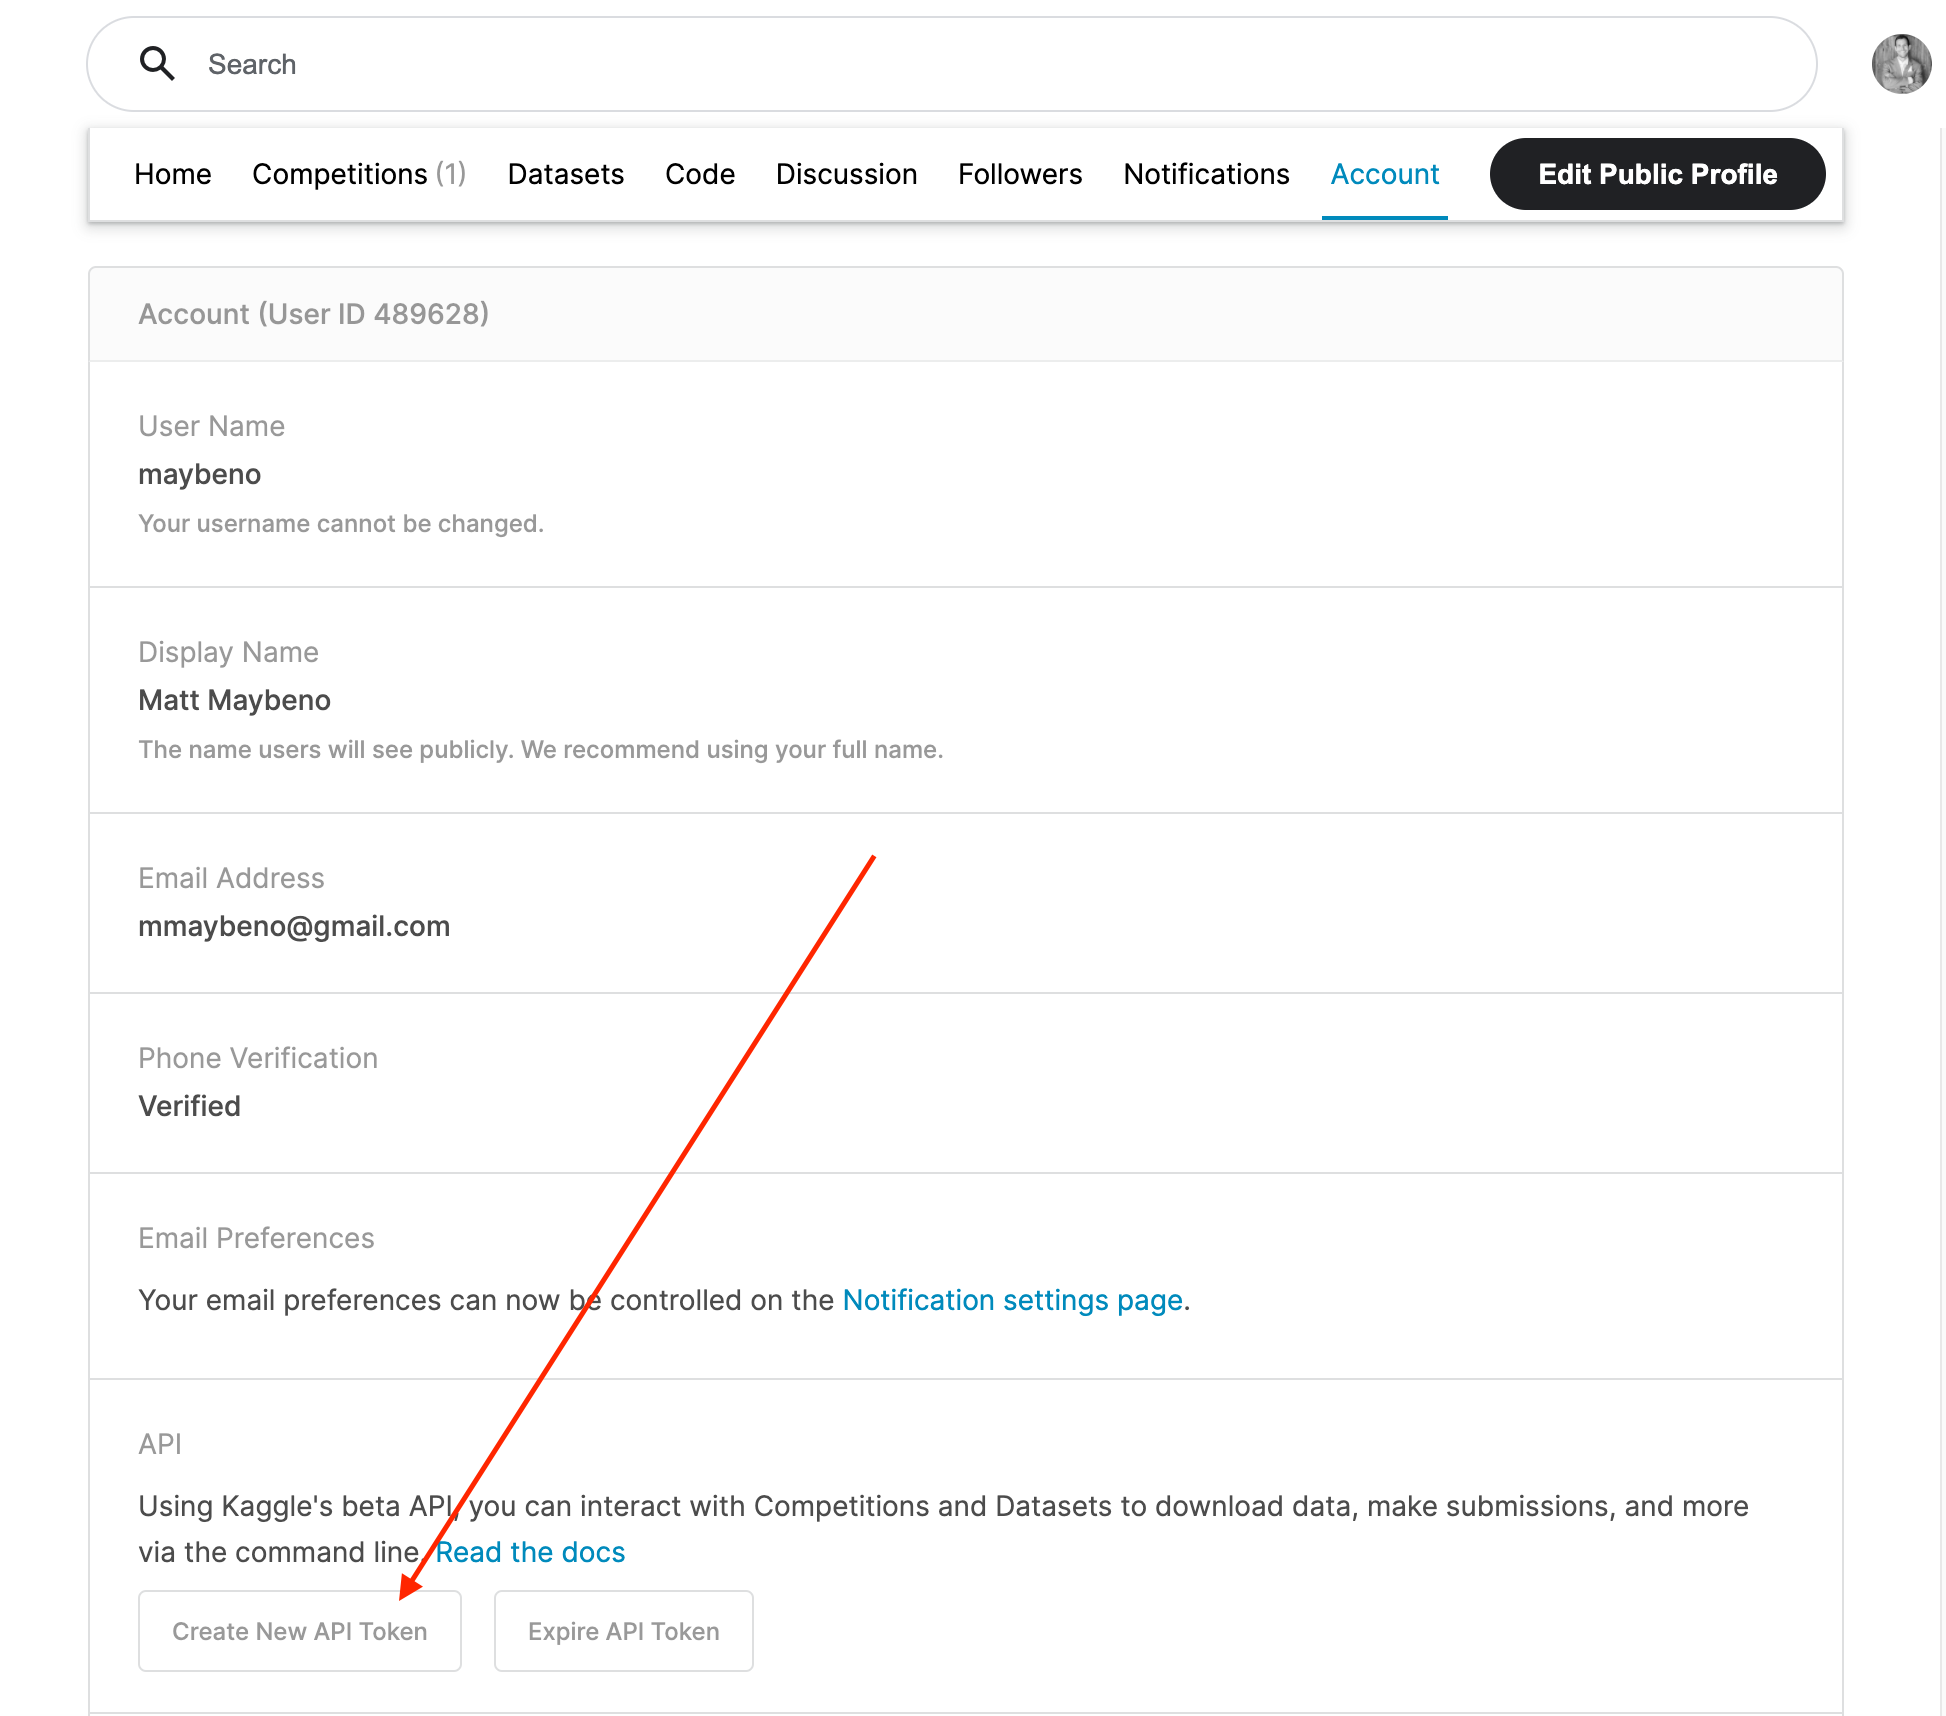
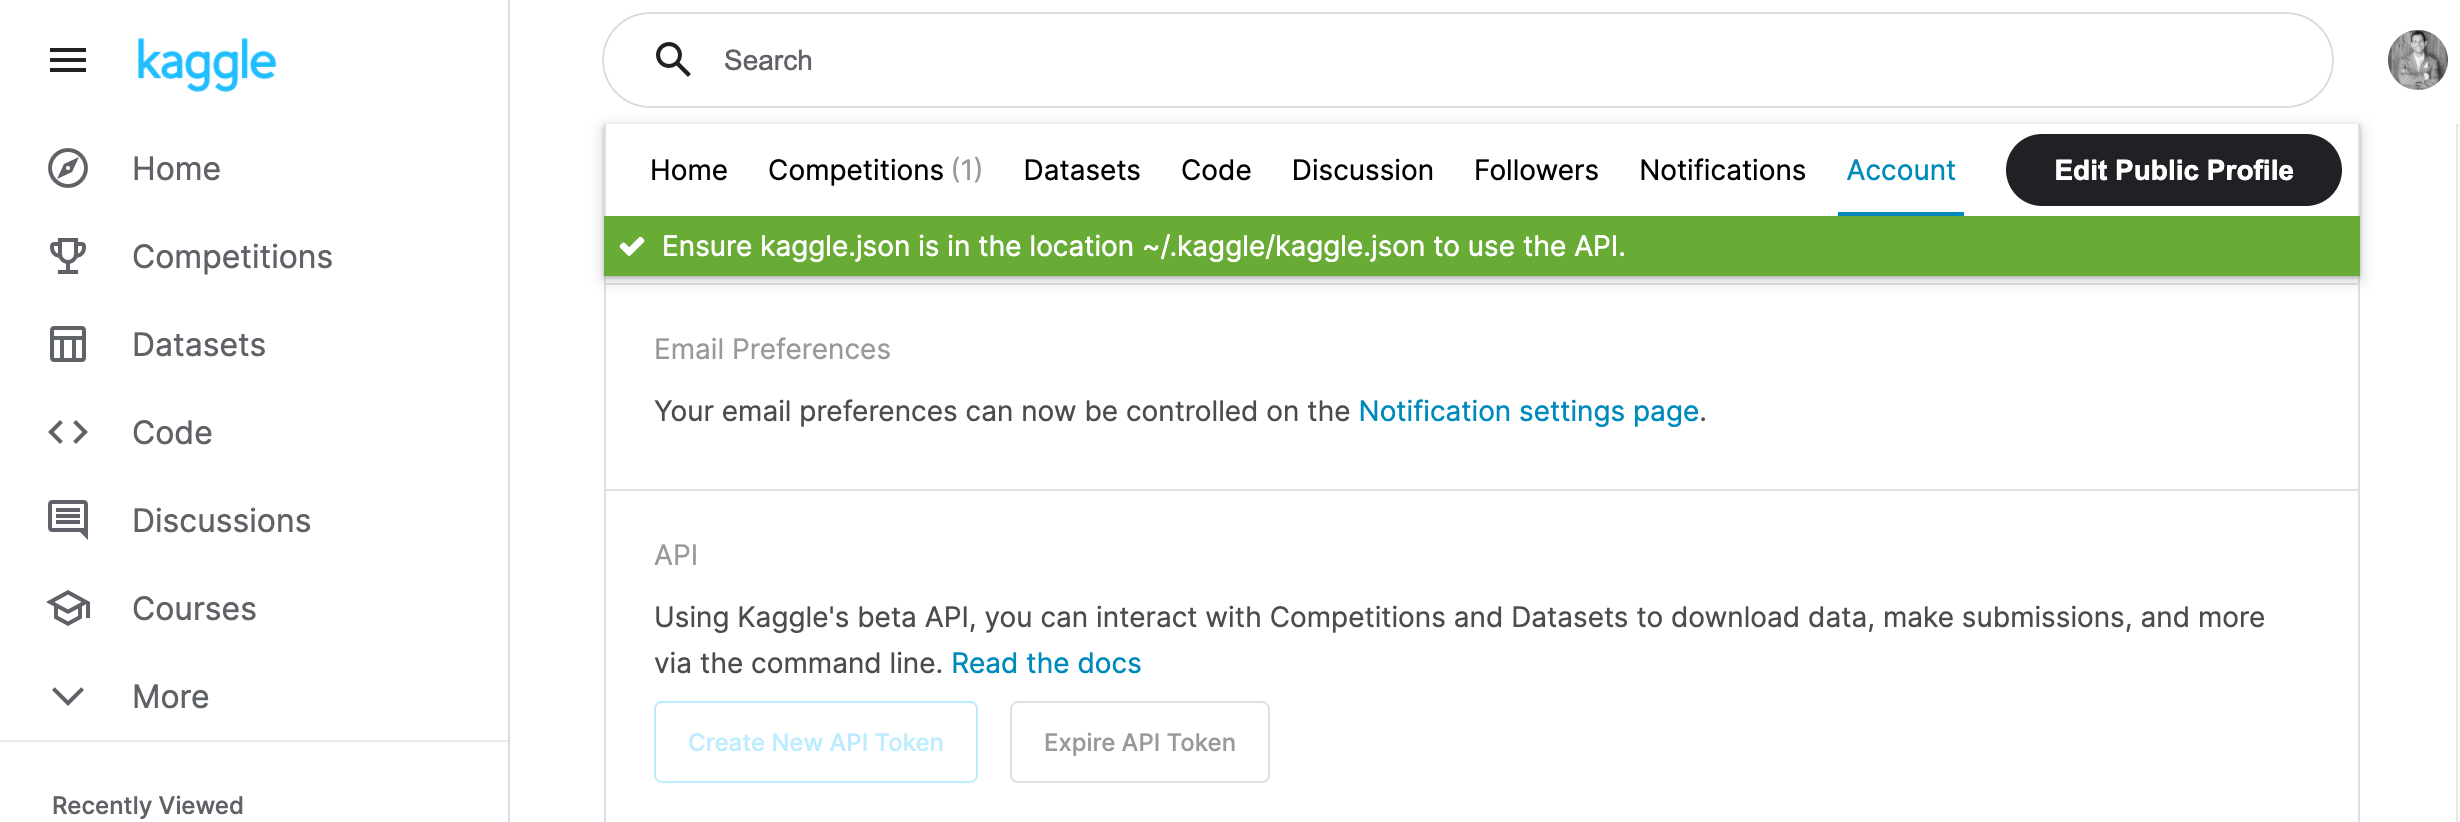
3. Open up `kaggle.json` and use the username and key.
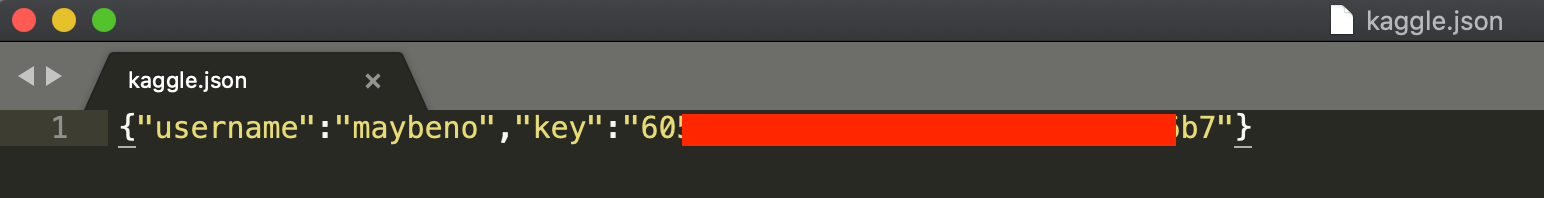

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install --upgrade ipykernel
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir --ignore-installed PyYAML
!pip install -U psutil
!pip install bokeh==2.0.1
!pip install kaggle
!pip install python-dotenv

### Setup Kaggle API Key

In [4]:
# create the .kaggle directory and an empty kaggle.json file
# !mkdir -p /root/.kaggle
# !touch /root/.kaggle/kaggle.json
# !chmod 600 /root/.kaggle/kaggle.json

In [5]:
!echo "KAGGLE_USERNAME=tylercelestin" >> .env
!echo "KAGGLE_KEY=65cb47b39e2f99a80ad6ebc0e2e31e04" >> .env

In [6]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
from dotenv import dotenv_values

CONFIG = dotenv_values('.env')
kaggle_username = CONFIG['KAGGLE_USERNAME']
kaggle_key = CONFIG['KAGGLE_KEY']

# Save API token the kaggle.json file
# with open("/root/.kaggle/kaggle.json", "w") as f:
#     f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
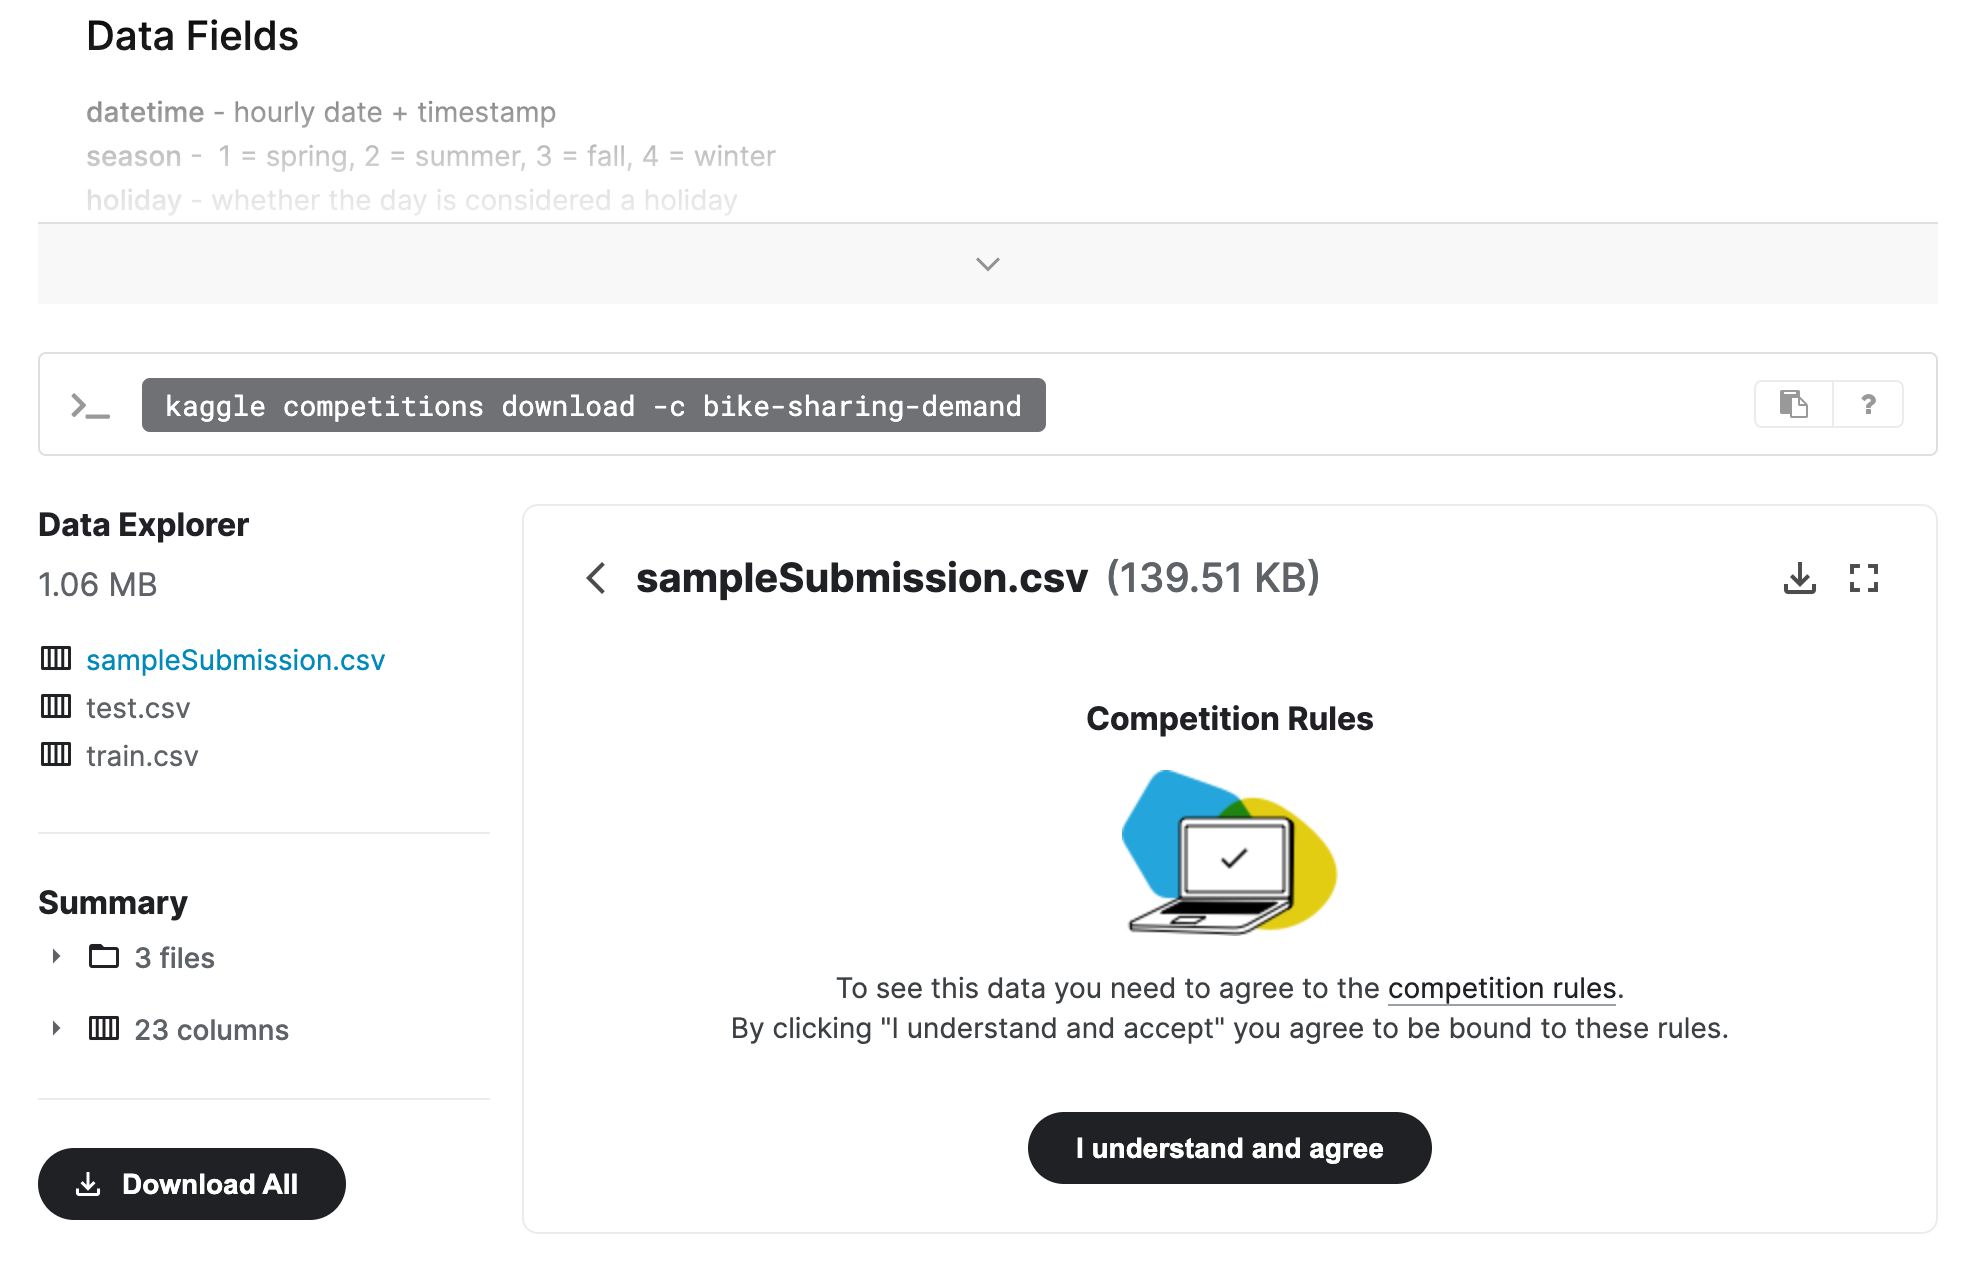

In [7]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [8]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [9]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train['datetime'] = train['datetime'].apply(pd.to_datetime)
print(train.dtypes)
train.head()

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object


datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [10]:
# Simple output of the train dataset to view some of the min/max/variation of the dataset features.
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [11]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test['datetime'] = test['datetime'].apply(pd.to_datetime)
print(test.dtypes)
test.head()

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object


datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [12]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission['datetime'] = submission['datetime'].apply(pd.to_datetime)
print(submission.dtypes)
submission.head()

datetime    datetime64[ns]
count                int64
dtype: object


datetime  count
0 2011-01-20 00:00:00      0
1 2011-01-20 01:00:00      0
2 2011-01-20 02:00:00      0
3 2011-01-20 03:00:00      0
4 2011-01-20 04:00:00      0

In [13]:
# rm -r AutogluonModels

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [14]:
train_new=train[['datetime', 'season', 'holiday', 'workingday','weather',
        'atemp', 'temp',
       'humidity', 'windspeed', 'count']]

predictor = TabularPredictor(
    label='count',
    problem_type= 'regression',
    eval_metric='root_mean_squared_error'
).fit(
    train_data=train_new,
    time_limit=600,
    presets='best_quality'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230610_023602/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230610_023602/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu May 4 09:55:30 UTC 2023
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2946.43 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: 

### Review AutoGluon's training run with ranking of models that did the best.

In [15]:
predictor.fit_summary() 

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.700985      12.578156  434.655412                0.000700           0.290831            3       True         15
1   RandomForestMSE_BAG_L2  -53.290701      11.780226  402.199475                0.600530          27.475152            2       True         12
2     ExtraTreesMSE_BAG_L2  -53.712196      11.752374  383.065323                0.572679           8.341000            2       True         14
3          LightGBM_BAG_L2  -55.069219      11.404248  398.548429                0.224552          23.824106            2       True         11
4          CatBoost_BAG_L2  -55.560376      11.238164  440.716027                0.058468          65.991703            2       True         13
5        LightGBMXT_BAG_L2  -60.557070      14.650172  428.822528         

/opt/conda/lib/python3.7/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446146,
  'KNeighborsDist_BAG_L1': -84.12506123181544,
  'LightGBMXT_BAG_L1': -131.55260016792946,
  'LightGBM_BAG_L1': -

In [16]:
leaderboard = predictor.leaderboard()

                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.700985      12.578156  434.655412                0.000700           0.290831            3       True         15
1   RandomForestMSE_BAG_L2  -53.290701      11.780226  402.199475                0.600530          27.475152            2       True         12
2     ExtraTreesMSE_BAG_L2  -53.712196      11.752374  383.065323                0.572679           8.341000            2       True         14
3          LightGBM_BAG_L2  -55.069219      11.404248  398.548429                0.224552          23.824106            2       True         11
4          CatBoost_BAG_L2  -55.560376      11.238164  440.716027                0.058468          65.991703            2       True         13
5        LightGBMXT_BAG_L2  -60.557070      14.650172  428.822528                3.470477          54.098205            2       True    

In [19]:
best_model_name = leaderboard.iloc[0]['model']
print(best_model_name)
'''
best_model = predictor.get_model(best_model_name)
^threw an error that predictor does not have attribute .get_model so I decided
to just print the best model name from the line and add that to the report
'''

WeightedEnsemble_L3


'\nbest_model = predictor.get_model(best_model_name)\n^threw an error that predictor does not have attribute .get_model so I decided\nto just print the best model name from the line and add that to the report\n'

### Create predictions from test dataset

In [22]:
predictions = predictor.predict(test)
print(predictions)
predictions.head()

0        23.336143
1        40.425446
2        44.890549
3        48.030472
4        50.929520
           ...    
6488    157.007141
6489    157.044296
6490    153.247528
6491    144.170929
6492    148.551086
Name: count, Length: 6493, dtype: float32


0    23.336143
1    40.425446
2    44.890549
3    48.030472
4    50.929520
Name: count, dtype: float32

In [23]:
predictor.leaderboard(extra_info=True, silent=True)
#shows that weightedensemble_l3 is the best mode

model   score_val  pred_time_val    fit_time  \
0      WeightedEnsemble_L3  -52.700985      12.578156  434.655412   
1   RandomForestMSE_BAG_L2  -53.290701      11.780226  402.199475   
2     ExtraTreesMSE_BAG_L2  -53.712196      11.752374  383.065323   
3          LightGBM_BAG_L2  -55.069219      11.404248  398.548429   
4          CatBoost_BAG_L2  -55.560376      11.238164  440.716027   
5        LightGBMXT_BAG_L2  -60.557070      14.650172  428.822528   
6    KNeighborsDist_BAG_L1  -84.125061       0.103511    0.029305   
7      WeightedEnsemble_L2  -84.125061       0.104525    0.455981   
8    KNeighborsUnif_BAG_L1 -101.546199       0.103539    0.118610   
9   RandomForestMSE_BAG_L1 -116.602057       0.522369   11.286367   
10    ExtraTreesMSE_BAG_L1 -124.653520       0.503438    5.290406   
11         CatBoost_BAG_L1 -130.592714       0.100315  192.961457   
12         LightGBM_BAG_L1 -131.048553       1.381095   27.438796   
13       LightGBMXT_BAG_L1 -131.552600       8.038039   63.216460   
14  NeuralNetFastAI_BAG_L1 -137.466566       0.427389   74.382922   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.000700           0.290831            3       True   
1                 0.600530          27.475152            2       True   
2                 0.572679           8.341000            2       True   
3                 0.224552          23.824106            2       True   
4                 0.058468          65.991703            2       True   
5                 3.470477          54.098205            2       True   
6                 0.103511           0.029305            1       True   
7                 0.001013           0.426676            2       True   
8                 0.103539           0.118610            1       True   
9                 0.522369          11.286367            1       True   
10                0.503438           5.290406            1       True   
11                0.100315         192.961457            1       True   
12                1.381095          27.438796            1       True   
13                8.038039          63.216460            1       True   
14                0.427389          74.382922            1       True   

    fit_order  num_features  ...  \
0          15             3  ...   
1          12            21  ...   
2          14            21  ...   
3          11            21  ...   
4          13            21  ...   
5          10            21  ...   
6           2            11  ...   
7           9             1  ...   
8           1            11  ...   
9           5            13  ...   
10          7            13  ...   
11          6            13  ...   
12          4            13  ...   
13          3            13  ...   
14          8            13  ...   

                                                                                                                     hyperparameters  \
0                         {'use_orig_features': False, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True}   
1   {'use_orig_features': True, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True, 'use_child_oof': True}   
2   {'use_orig_features': True, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True, 'use_child_oof': True}   
3                          {'use_orig_features': True, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True}   
4                          {'use_orig_features': True, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True}   
5                          {'use_orig_features': True, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True}   
6   {'use_orig_features': True, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True, 'use_child_oof': True}   
7                         {'use_orig_features': False, 'max_base_models': 25, 'max

In [24]:
predictor.predict_proba(test)

0        23.336143
1        40.425446
2        44.890549
3        48.030472
4        50.929520
           ...    
6488    157.007141
6489    157.044296
6490    153.247528
6491    144.170929
6492    148.551086
Name: count, Length: 6493, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [25]:
# Describe the `predictions` series to see if there are any negative value
%matplotlib inline
predictions.describe()

count    6493.000000
mean      100.750877
std        90.205147
min         2.914509
25%        20.470156
50%        63.077423
75%       170.582153
max       366.162476
Name: count, dtype: float64

In [26]:
# How many negative values do we have?
print(predictions.lt(0).sum().sum())
# Returns True so no negative values
print(predictions.describe())

0
count    6493.000000
mean      100.750877
std        90.205147
min         2.914509
25%        20.470156
50%        63.077423
75%       170.582153
max       366.162476
Name: count, dtype: float64


In [27]:
# Set them to zero
# Just to make sure
print(predictions.describe())
data = predictions._get_numeric_data()
data[data < 0] = 0
print(predictions.describe())
print((predictions>=0).all())

count    6493.000000
mean      100.750877
std        90.205147
min         2.914509
25%        20.470156
50%        63.077423
75%       170.582153
max       366.162476
Name: count, dtype: float64
count    6493.000000
mean      100.750877
std        90.205147
min         2.914509
25%        20.470156
50%        63.077423
75%       170.582153
max       366.162476
Name: count, dtype: float64
True


### Set predictions to submission dataframe, save, and submit

In [28]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [29]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 344kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [31]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2023-06-10 02:56:21  first raw submission               complete  1.80969      1.80969       
submission_new_hpo.csv       2023-06-09 21:34:23  new features with hyperparameters  complete  0.49940      0.49940       
submission_new_features.csv  2023-06-09 21:32:41  new features                       complete  0.65342      0.65342       
submission.csv               2023-06-09 21:31:26  first raw submission               complete  1.78785      1.78785       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

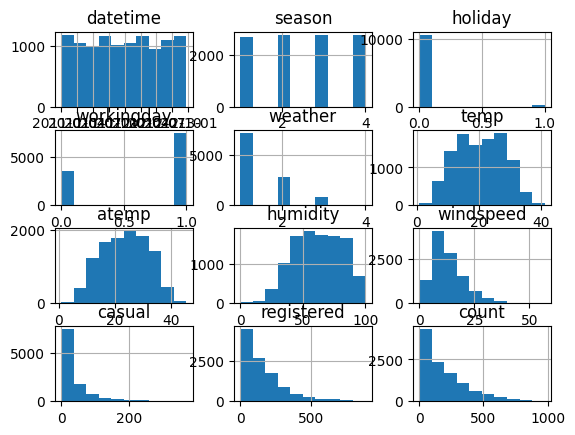

In [32]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [33]:
# create a new feature
train['year'] = train.datetime.dt.year
train['month'] = train.datetime.dt.month
train['hour'] = train.datetime.dt.hour
test['year'] = test.datetime.dt.year
test['month']= test.datetime.dt.month
test['hour'] = test.datetime.dt.hour
# print(train.info)
# print(test.datetime.dt.hour)

In [34]:
print(train.head)
print(test.head)

<bound method NDFrame.head of                  datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
0  

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [35]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [36]:
# View are new feature
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  hour        10886 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(3), int64(9)
memory usage: 

datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  hour  
0        81        0.0       3          13     16  2011      1     0  
1        80        0.0       8          32     40  2011      1     1  
2        80        0.0       5          27     32  2011      1     2  
3        75        0.0       3          10     13  2011      1     3  
4        75        0.0       0           1      1  2011      1     4

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'hour'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

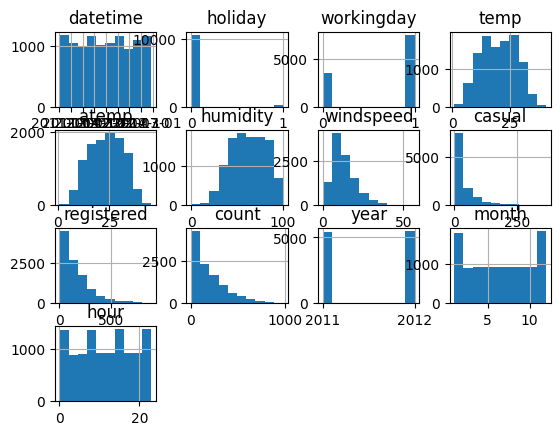

In [37]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [38]:
train_new_more_fts = train[[
    'datetime', 'season',
    'holiday', 'workingday',
    'weather', 'temp', 
    'atemp', 'humidity', 'windspeed',
    'count', 'year', 'month', 'hour'
]]

predictor_new_features = TabularPredictor(
    label='count',
    eval_metric='root_mean_squared_error'
).fit(
    train_data=train_new_more_fts,
    time_limit=600,
    presets='best_quality'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230610_025750/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230610_025750/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu May 4 09:55:30 UTC 2023
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

In [39]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.168615      21.125860  556.967085                0.000889           0.352798            3       True         15
1          CatBoost_BAG_L2  -30.381944      19.264704  470.274063                0.095045          74.720857            2       True         13
2          LightGBM_BAG_L2  -30.574520      19.452392  419.431049                0.282733          23.877843            2       True         11
3        LightGBMXT_BAG_L2  -31.200626      20.134378  425.579933                0.964719          30.026727            2       True         10
4     ExtraTreesMSE_BAG_L2  -31.412835      19.797608  404.893049                0.627949           9.339843            2       True         14
5   RandomForestMSE_BAG_L2  -31.492619      19.782475  427.988860         

/opt/conda/lib/python3.7/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446146,
  'KNeighborsDist_BAG_L1': -84.12506123181544,
  'LightGBMXT_BAG_L1': -34.439518618233166,
  'LightGBM_BAG_L1': -

In [40]:
new_fts_predict = predictor_new_features.predict_proba(test)
new_fts_predict.describe()

count    6493.000000
mean      152.905899
std       131.561417
min         2.199408
25%        54.145962
50%       118.309036
75%       216.706192
max       803.613464
Name: count, dtype: float64

In [41]:
# Remember to set all negative values to zero
(new_fts_predict >= 0).all()

True

In [42]:
data_new_fts = new_fts_predict._get_numeric_data()
data_new_fts[data_new_fts < 0] = 0
print(new_fts_predict.describe())
print((new_fts_predict>=0).all())

count    6493.000000
mean      152.905899
std       131.561417
min         2.199408
25%        54.145962
50%       118.309036
75%       216.706192
max       803.613464
Name: count, dtype: float64
True


In [43]:
submission_new_features = pd.read_csv('sampleSubmission.csv')
submission_new_features['datetime'] = submission_new_features['datetime'].apply(pd.to_datetime)

In [44]:
# Same submitting predictions
submission_new_features["count"] = new_fts_predict
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [45]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 342kB/s]
Successfully submitted to Bike Sharing Demand

In [46]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-06-10 03:08:51  new features                       pending                              
submission.csv               2023-06-10 02:56:21  first raw submission               complete  1.80969      1.80969       
submission_new_hpo.csv       2023-06-09 21:34:23  new features with hyperparameters  complete  0.49940      0.49940       
submission_new_features.csv  2023-06-09 21:32:41  new features                       complete  0.65342      0.65342       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [47]:
import autogluon as ag
nn_options = {
    'num_epochs':10,
    'learning_rate':ag.core.space.Real(1e-4, 1e-2, default=5e-4, log=True),
    'activation':ag.core.space.Categorical('relu', 'softrelu', 'tanh'),
    'dropout_prob':ag.core.space.Real(0.0, 0.5, default=0.1)
}

gbm_options = {
    'num_boost_round':100,
    'num_leaves':ag.core.space.Int(
        lower=26, upper=66, default=36
    )
}

label='count'
eval_metric='root_mean_squared_error'

time_limit=10800
num_trials = 5 
search_strategy = 'auto'

hyperparameters= {
    'GBM':gbm_options,
    'NN_TORCH':nn_options
}

hyperparameter_tune_kwargs= {
    'num_trials':num_trials,
    'scheduler':'local',
    'searcher':search_strategy
}

train_new_more_fts = train[[
    'datetime', 'season',
    'holiday', 'workingday',
    'weather', 'temp', 
    'atemp', 'humidity', 'windspeed',
    'count', 'year', 'month', 'hour'
]]

In [48]:
predictor_new_hpo = TabularPredictor(
    label=label, 
    eval_metric=eval_metric
    ).fit(
    train_data=train_new_more_fts, 
    time_limit=time_limit,
    hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

Fitted model: NeuralNetTorch/235ec198 ...
	-99.1567	 = Validation score   (-root_mean_squared_error)
	6.61s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetTorch/2422333a ...
	-142.477	 = Validation score   (-root_mean_squared_error)
	26.44s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: NeuralNetTorch/24289784 ...
	-142.5195	 = Validation score   (-root_mean_squared_error)
	7.75s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetTorch/2a92ad3a ...
	-104.2134	 = Validation score   (-root_mean_squared_error)
	5.82s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetTorch/2f4b1dd0 ...
	-139.5594	 = Validation score   (-root_mean_squared_error)
	4.68s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 1079.98s of the 10763.94s of remaining time.
	-38.7079	 = Validation score   (-root_mean_squared_error)
	0.36s	 = Training   runtime
	0.0

In [49]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2  -38.707900       0.031845   1.135332                0.000583           0.355552            2       True         11
1               LightGBM/T3  -38.889282       0.016754   0.422542                0.016754           0.422542            1       True          3
2               LightGBM/T2  -40.102057       0.014507   0.357238                0.014507           0.357238            1       True          2
3               LightGBM/T1  -40.522549       0.015363   0.439692                0.015363           0.439692            1       True          1
4               LightGBM/T5  -43.470641       0.017081   0.382083                0.017081           0.382083            1       True          5
5   NeuralNetTorch/235ec198  -99.156693       0.039144   6.607141         

/opt/conda/lib/python3.7/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM/T1': 'LGBModel',
  'LightGBM/T2': 'LGBModel',
  'LightGBM/T3': 'LGBModel',
  'LightGBM/T4': 'LGBModel',
  'LightGBM/T5': 'LGBModel',
  'NeuralNetTorch/235ec198': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/2422333a': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/24289784': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/2a92ad3a': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/2f4b1dd0': 'TabularNeuralNetTorchModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T1': -40.522549011860065,
  'LightGBM/T2': -40.10205686272492,
  'LightGBM/T3': -38.88928172308427,
  'LightGBM/T4': -120.41401628519928,
  'LightGBM/T5': -43.47064118624803,
  'NeuralNetTorch/235ec198': -99.15669268431569,
  'NeuralNetTorch/2422333a': -142.47703842164395,
  'NeuralNetTorch/24289784': -142.51951217177538,
  'NeuralNetTorch/2a92ad3a': -104.21337703165433,
  'NeuralNetTorch/2f4b1dd0': -139.55944186584068,
  'WeightedEnsemble_L2': -38.70789997

In [50]:
predict_hpo=predictor_new_hpo.predict_proba(test)
predict_hpo.head()

0    16.388594
1     7.358500
2     3.811482
3     3.811482
4     3.811482
Name: count, dtype: float32

In [51]:
%matplotlib inline
predict_hpo.describe()

count    6493.000000
mean      193.974884
std       172.396301
min        -3.447194
25%        49.896385
50%       152.750336
75%       290.062958
max       867.569702
Name: count, dtype: float64

In [52]:
# Remember to set all negative values to zero
# (predict_hpo > 0).all()
data = predict_hpo._get_numeric_data()
data[data < 0] = 0
print(predict_hpo.describe())
print((predict_hpo>=0).all())

count    6493.000000
mean      193.976501
std       172.394394
min         0.000000
25%        49.896385
50%       152.750336
75%       290.062958
max       867.569702
Name: count, dtype: float64
True


In [53]:
submission_new_hpo = pd.read_csv('sampleSubmission.csv')
submission_new_hpo['datetime'] = submission_new_hpo['datetime'].apply(pd.to_datetime)

In [54]:
# Same submitting predictions
submission_new_hpo["count"] = predict_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [55]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 466kB/s]
Successfully submitted to Bike Sharing Demand

In [56]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-06-10 03:09:32  new features with hyperparameters  complete  0.51098      0.51098       
submission_new_features.csv  2023-06-10 03:08:51  new features                       complete  0.68028      0.68028       
submission.csv               2023-06-10 02:56:21  first raw submission               complete  1.80969      1.80969       
submission_new_hpo.csv       2023-06-09 21:34:23  new features with hyperparameters  complete  0.49940      0.49940       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

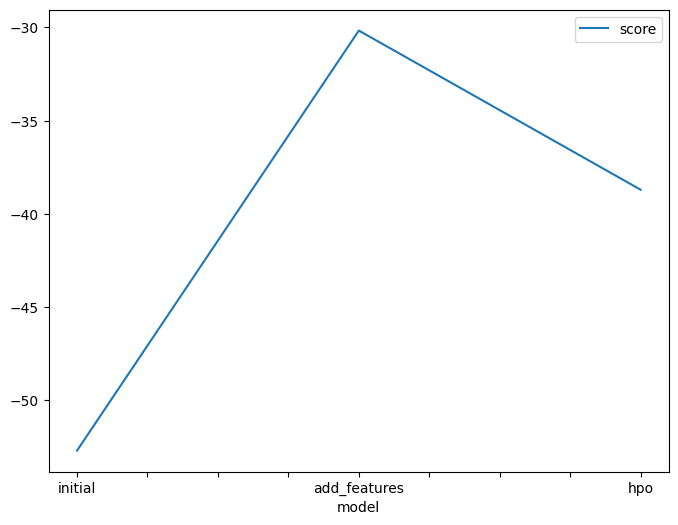

In [57]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)

# I used RMSE for the third model
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [predictor.leaderboard(silent=True)['score_val'][0],
        predictor_new_features.leaderboard(silent=True)['score_val'][0],
        predictor_new_hpo.leaderboard(silent=True)['score_val'][0]]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

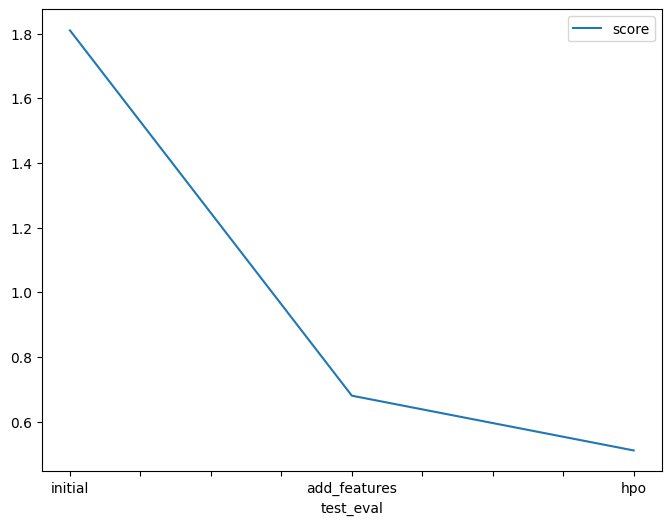

In [60]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80969, 0.68028, 0.51098]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [59]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ['train_data','train_new_more_fts' ,'GBM' ],
    "hpo2": ['eval_metric', 'eval_metric','NN_TORCH' ],
    "hpo3": [ 'presets','presets','NA' ],
    "score": [predictor.leaderboard(silent=True)['score_val'][0],
        predictor_new_features.leaderboard(silent=True)['score_val'][0],
        predictor_new_hpo.leaderboard(silent=True)['score_val'][0]]
})

model                hpo1         hpo2     hpo3      score
0       initial          train_data  eval_metric  presets -52.700985
1  add_features  train_new_more_fts  eval_metric  presets -30.168615
2           hpo                 GBM     NN_TORCH       NA -38.707900